#PWSKILLS ASSIGNMENT
##EDA
###EDA1

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# 1. What is the range of selling prices in the dataset?
# Get the minimum and maximum selling price in the dataset
price_range = df['selling_price'].min(), df['selling_price'].max()
print(f"Range of selling prices: {price_range}")


Range of selling prices: (5000, 760000)


In [ ]:
# 2. What is the median selling price for bikes in the dataset?
# Calculate the median selling price
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")


Median selling price: 45000.0


In [ ]:
# 3. What is the most common seller type?
# Find the most common seller type in the dataset
common_seller_type = df['seller_type'].mode()[0]
print(f"Most common seller type: {common_seller_type}")


Most common seller type: Individual


In [ ]:
# 4. How many bikes have driven more than 50,000 kilometers?
# Count the number of bikes with km_driven greater than 50,000
bikes_50k_plus = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes with more than 50,000 kilometers: {bikes_50k_plus}")


Bikes with more than 50,000 kilometers: 170


In [ ]:
# 5. What is the average km_driven value for each ownership type?
# Group the data by 'owner' and calculate the average km_driven for each group
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(f"Average km_driven by ownership type:\n{avg_km_by_owner}")


Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# 6. What proportion of bikes are from the year 2015 or older?
# Calculate the proportion of bikes manufactured in 2015 or earlier
older_bikes_proportion = (df['year'] <= 2015).mean()
print(f"Proportion of bikes from 2015 or older: {older_bikes_proportion:.2f}")


Proportion of bikes from 2015 or older: 0.57


In [ ]:
# 7. What is the trend of missing values across the dataset?
# Show the number of missing values in each column of the dataset
missing_values_trend = df.isnull().sum()
print(f"Missing values across columns:\n{missing_values_trend}")


Missing values across columns:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
# Find the highest ex_showroom_price and the corresponding bike
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Highest ex_showroom_price: {highest_ex_showroom_price['ex_showroom_price']} for bike: {highest_ex_showroom_price['name']}")


Highest ex_showroom_price: 1278000.0 for bike: Harley-Davidson Street Bob


In [ ]:
# 9. What is the total number of bikes listed by each seller type?
# Count the number of bikes listed by each seller type
bikes_by_seller_type = df['seller_type'].value_counts()
print(f"Total bikes listed by each seller type:\n{bikes_by_seller_type}")


Total bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


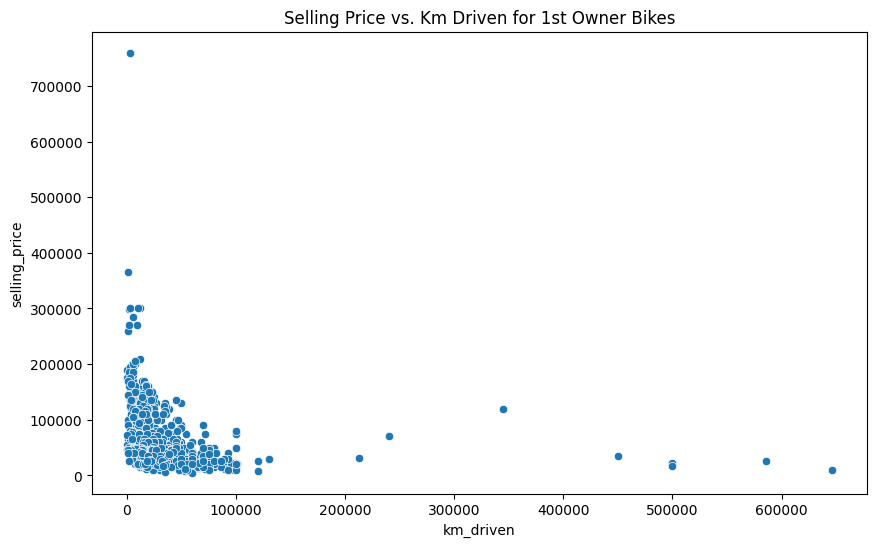

In [ ]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
# Visualize the relationship between selling_price and km_driven for bikes that are '1st owner'
import matplotlib.pyplot as plt
import seaborn as sns
first_owner_bikes = df[df['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'])
plt.title('Selling Price vs. Km Driven for 1st Owner Bikes')
plt.show()


In [ ]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
# Remove outliers in the km_driven column using the IQR (Interquartile Range) method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR))
df_cleaned = df[~outlier_condition]
print(f"Data after removing outliers: {df_cleaned.shape[0]} rows")


Data after removing outliers: 1022 rows


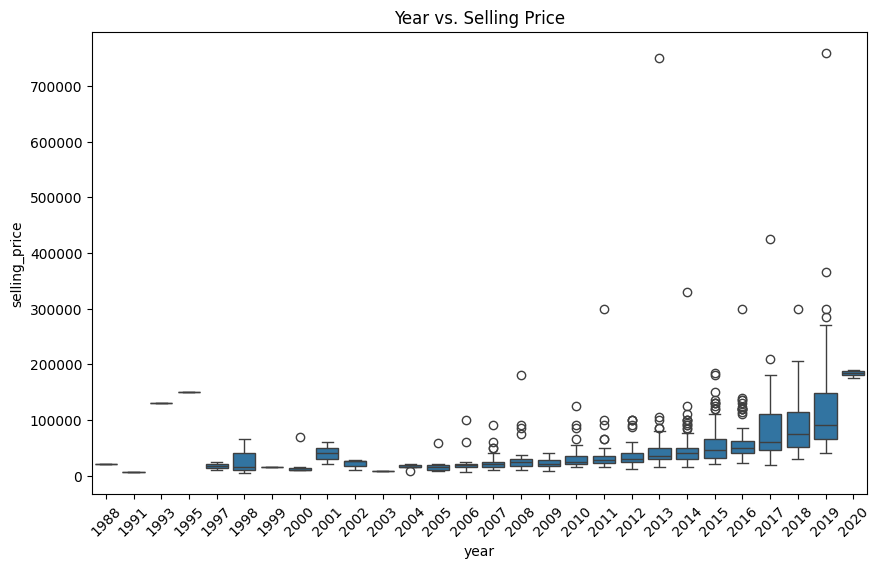

In [ ]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
# Create a boxplot to visualize the relationship between 'year' and 'selling_price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.title('Year vs. Selling Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
# Calculate the average depreciation based on the age of the bike (current year - manufacturing year)
df['age'] = 2025 - df['year']  # Assuming current year is 2025
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation = df.groupby('age')['depreciation'].mean()
print(f"Average depreciation by bike age:\n{avg_depreciation}")


Average depreciation by bike age:
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [ ]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
# Find bikes that are priced above the average price for their manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['price_above_avg'] = df.apply(lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1)
above_avg_bikes = df[df['price_above_avg']]
print(f"Bikes priced significantly above the average:\n{above_avg_bikes[['name', 'year', 'selling_price']]}")


Bikes priced significantly above the average:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


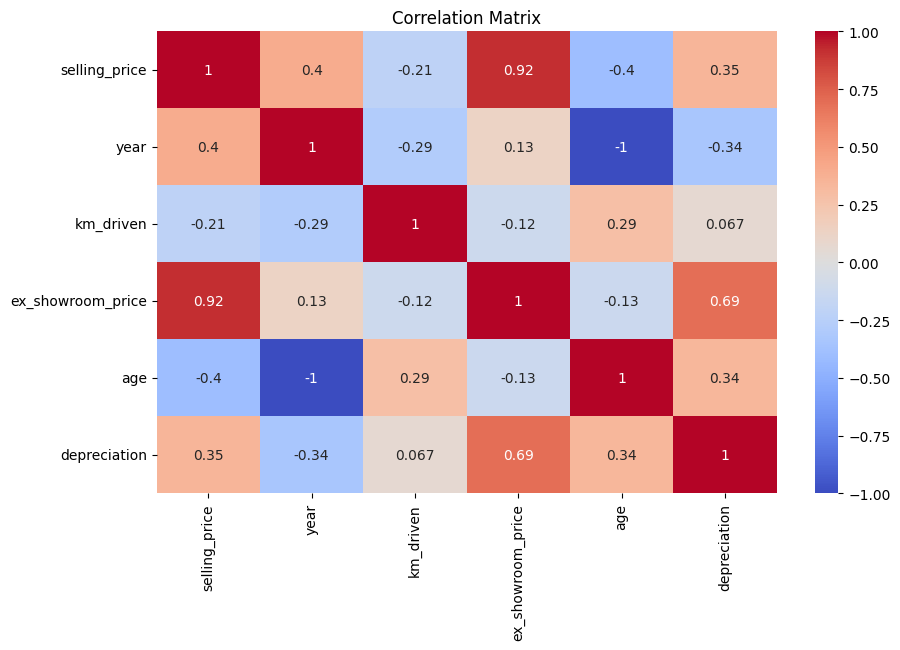

In [ ]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
# Create a correlation matrix for numeric columns and visualize it using a heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##EDA2

In [ ]:
df=pd.read_csv('/content/Car Sale.csv')

In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean()
dealer_avg_price.sort_values(ascending=False)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [ ]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
brand_price_variation = df.groupby('Company')['Price ($)'].std()
brand_price_variation.sort_values(ascending=False)


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


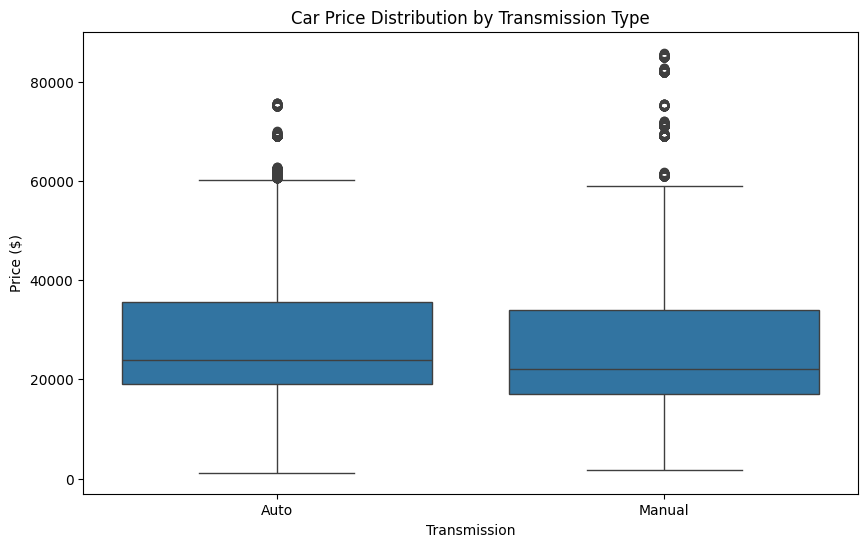

In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()


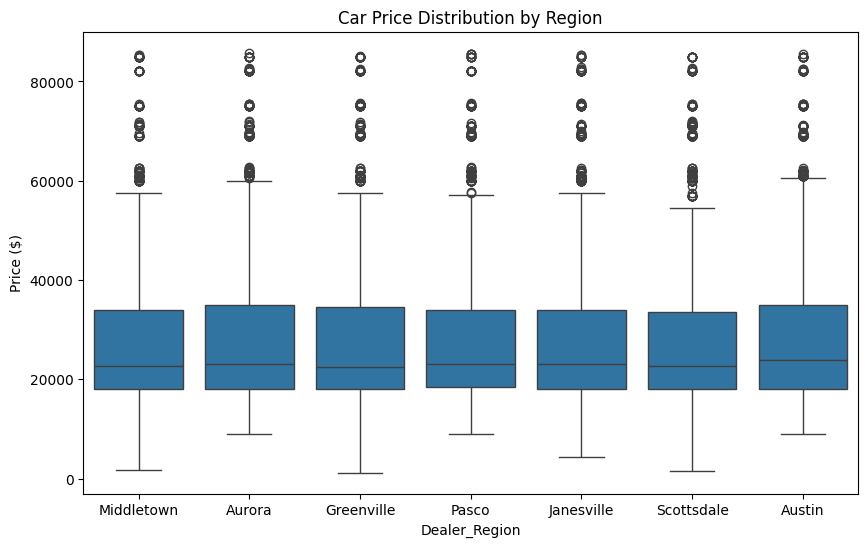

In [ ]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.show()


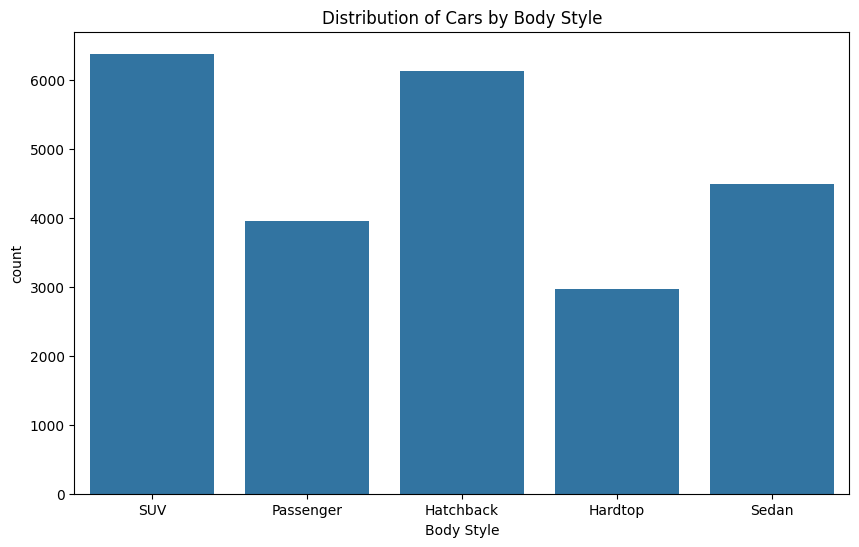

In [ ]:
# 5. What is the distribution of cars based on body styles?
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df)
plt.title('Distribution of Cars by Body Style')
plt.show()


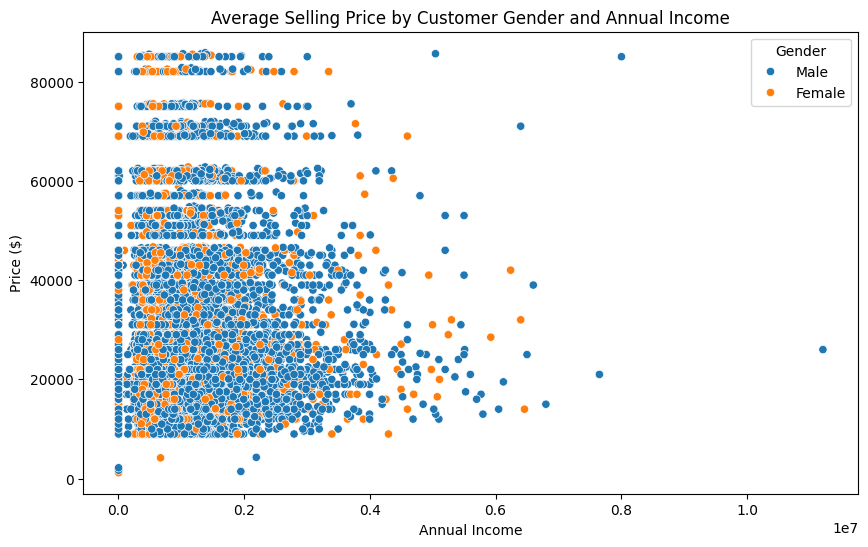

In [ ]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df)
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.show()


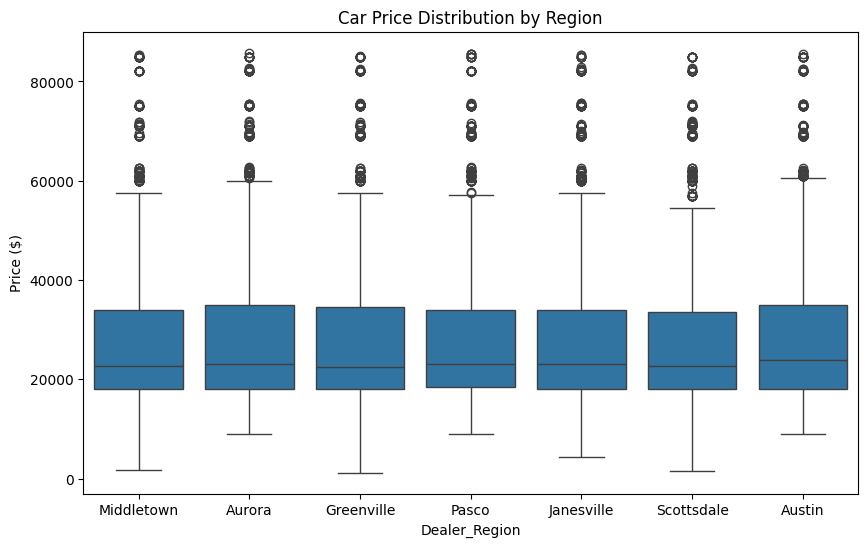

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [ ]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Car Price Distribution by Region')
plt.show()

# Count of cars sold per region
region_car_count = df['Dealer_Region'].value_counts()
print(region_car_count)


In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?
engine_avg_price = df.groupby('Engine')['Price ($)'].mean()
engine_avg_price.sort_values(ascending=False)


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


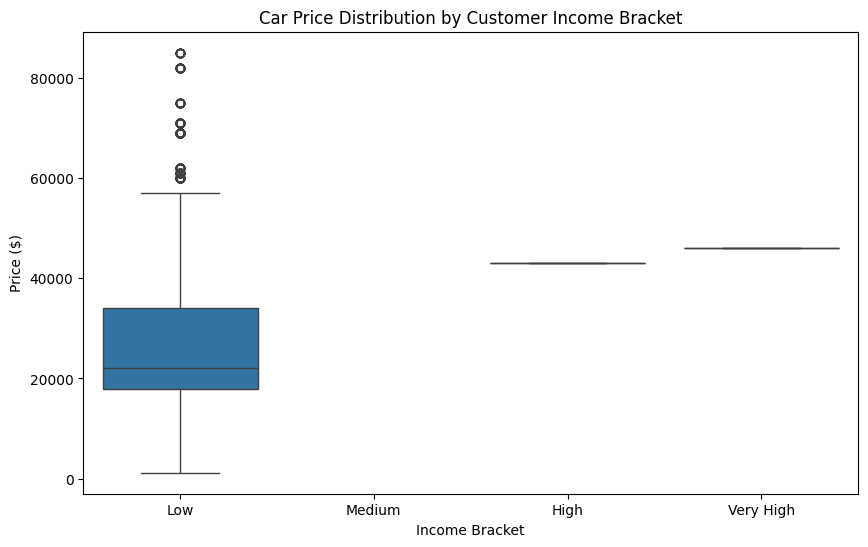

In [ ]:
# 9. How do car prices vary based on the customer’s annual income bracket?
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 30000, 60000, 90000, 120000], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title('Car Price Distribution by Customer Income Bracket')
plt.show()


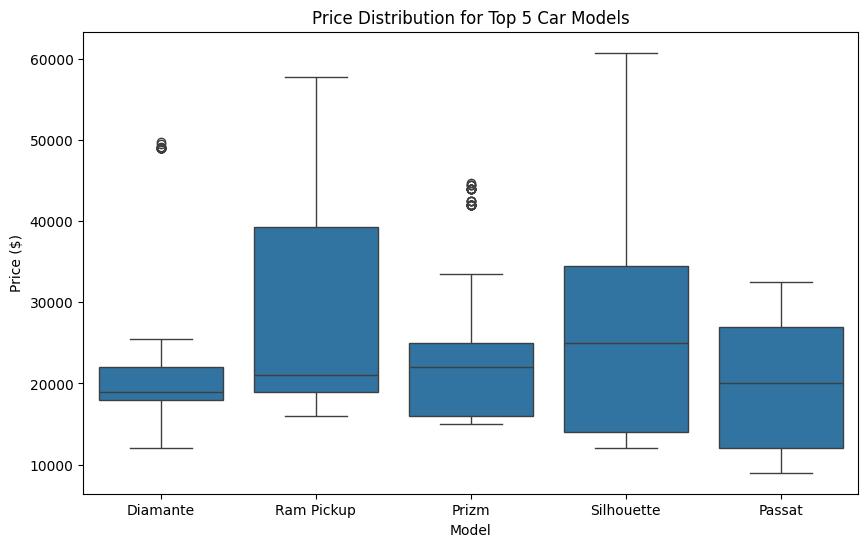

In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df['Model'].value_counts().head(5).index
top_5_model_data = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_model_data)
plt.title('Price Distribution for Top 5 Car Models')
plt.show()


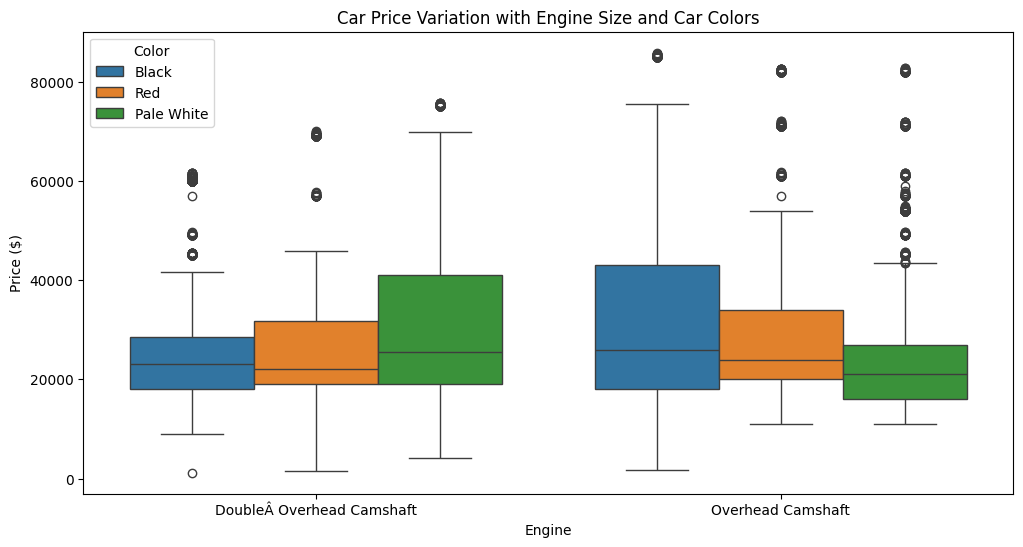

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


In [ ]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price Variation with Engine Size and Car Colors')
plt.show()

# Calculate variation in car prices by color
color_price_variation = df.groupby('Color')['Price ($)'].std()
color_price_variation.sort_values(ascending=False)


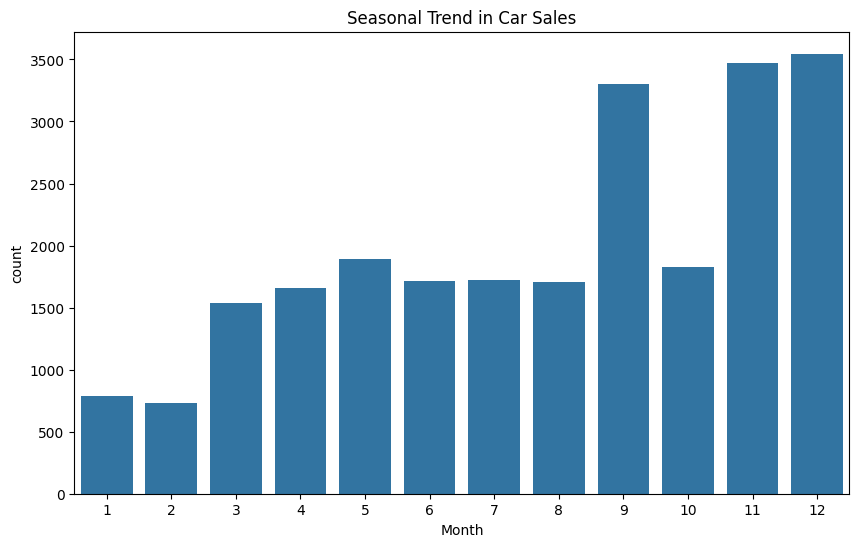

In [ ]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Seasonal Trend in Car Sales')
plt.show()


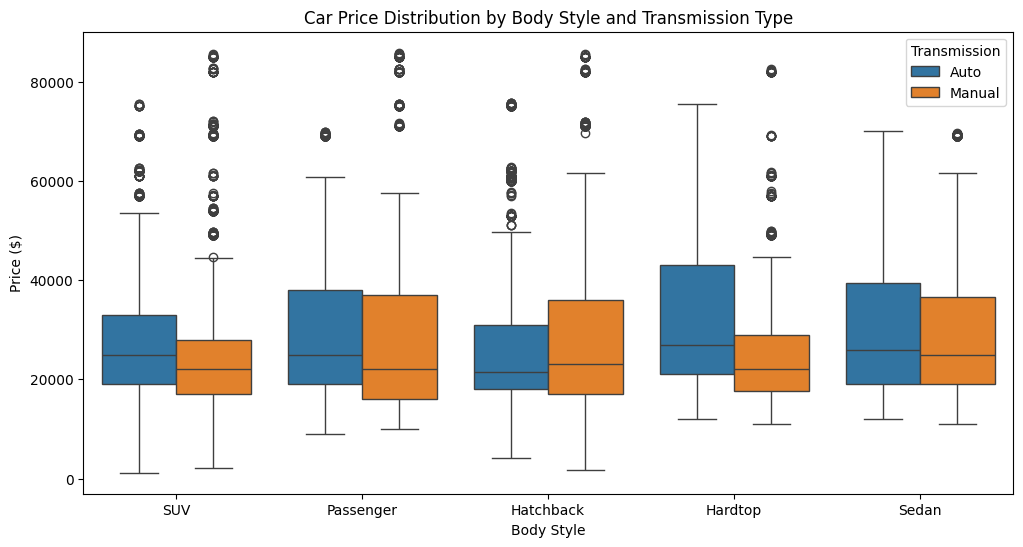

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.show()


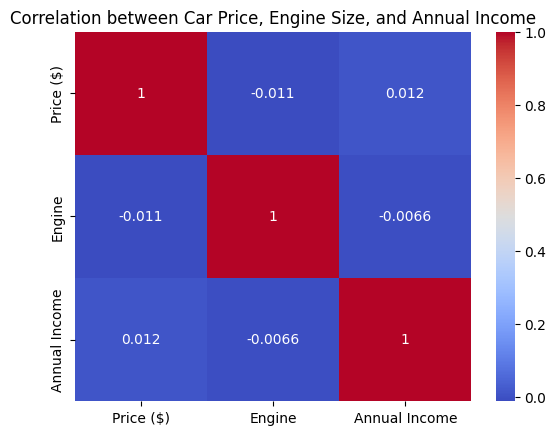

In [ ]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df_corr = df[['Price ($)', 'Engine', 'Annual Income']].copy()

# Convert 'Engine' to categorical numeric codes
df_corr['Engine'] = pd.factorize(df_corr['Engine'])[0]

correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Car Price, Engine Size, and Annual Income')
plt.show()


In [ ]:
# 15. How does the average car price vary across different car models and engine types?
model_engine_avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
model_engine_avg_price


Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


##EDA3

In [ ]:
df=pd.read_csv('/content/amazon.csv')

In [ ]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
# 1. What is the average rating for each product category?
avg_rating_by_category = df.groupby('category')['rating'].mean()
avg_rating_by_category.sort_values(ascending=False)


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
...,...
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.6
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5


In [ ]:
# 2. What are the top rating_count products by category?
top_rated_by_category = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))
top_rated_by_category[['product_name', 'rating_count']]


<ipython-input-55-e5030b533536>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_by_category = df.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))


,,product_name,rating_count
category,,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,900,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets",743,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads",653,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets",940,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0
...,...,...,...
"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|HandheldVacuums",1257,Eureka Forbes Active Clean 700 Watts Powerful ...,743.0
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers,1317,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,1424,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0


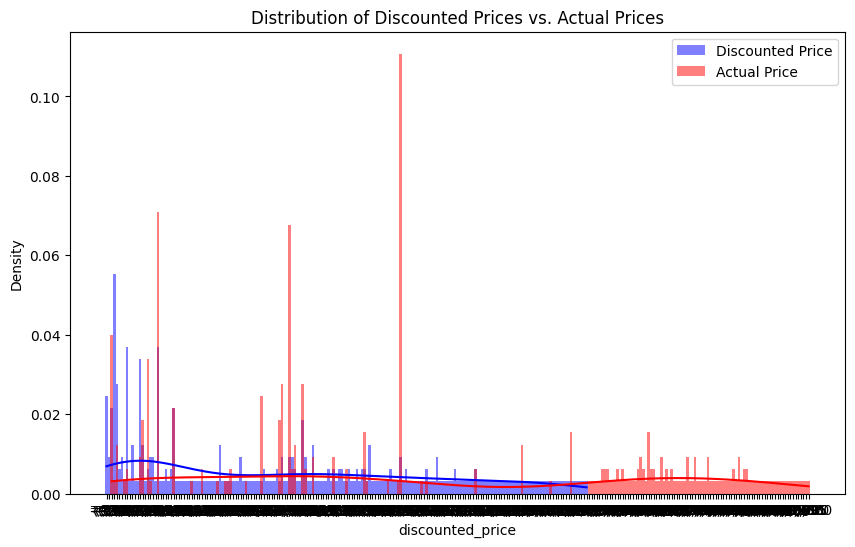

In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, stat="density", linewidth=0)
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, stat="density", linewidth=0)
plt.legend()
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()


In [ ]:
# 4. How does the average discount percentage vary across categories?
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
avg_discount_by_category.sort_values(ascending=False)


,discount_percentage
category,
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads",87.0
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands,80.0
Computers&Accessories|Components|InternalHardDrives,80.0
...,...
Computers&Accessories|Accessories&Peripherals|USBGadgets|Lamps,10.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DigitalKitchenScales|DigitalScales,0.0


In [ ]:
# 5. What are the most popular product names?
popular_products = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)
popular_products.head(10)


,rating_count
product_name,
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",2445.0
"Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)",1948.0
"Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)",1806.0
"Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White",1312.0
"Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Type C Devices – Red, 1 Meter",1151.0
"SWAPKART Fast Charging Cable and Data Sync USB Cable Compatible for iPhone 6/6S/7/7+/8/8+/10/11, 12, 13 Pro max iPad Air/Mini, iPod and iOS Devices (White)",1072.0
Eveready Red 1012 AAA Batteries - Pack of 10,989.0
"Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)",976.0
"Zoul USB Type C Fast Charging 3A Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31s M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (1M, Grey)",974.0


In [ ]:
# 6. What are the most popular product keywords?
# Extracting product keywords from product_name
from collections import Counter
import re

# Extract words from product names
keywords = ' '.join(df['product_name'].dropna()).split()
keywords = [re.sub(r'[^A-Za-z0-9]+', '', word.lower()) for word in keywords]

# Count the most common keywords
keyword_count = Counter(keywords)
keyword_count.most_common(10)


[('', 274),
 ('for', 204),
 ('with', 153),
 ('cable', 115),
 ('and', 84),
 ('black', 84),
 ('usb', 78),
 ('c', 70),
 ('remote', 69),
 ('compatible', 66)]

In [ ]:
# 7. What are the most popular product reviews?
most_popular_reviews = df.groupby('review_title')['rating_count'].sum().sort_values(ascending=False)
most_popular_reviews.head(10)


,rating_count
review_title,
"Great Cable, Charging Speeds Could Be Better,Good,A good cable.,One of the best type c cable,Works as intended.,A good buy. The extra length helps a lot.,Good,Ok",2922.0
"Good cable for car,Good substitute for orginal,Better Value for money Product,Way better than the original,Absolutely amazing.,Namm hi kafi hai,Very good,As the names say Durable cell it a durable cable ;-)",2445.0
"Good product,Its good, but micro usb doesn't fit my phone.,Good and useful item,It is very best cable,good,2 in 1 Charging Cable.,Sturdy cable overall,Nice & Best Charger Cabel",1806.0
"Used for 10 months,Quality is good,Good Aftersale Service,Super fast charging suppurt,Superb Quality and value for money,Good small cable,Nice,Highly recommended",1676.0
"Nice,Awesome,Quick not charger🤏,Expensive at this price,Multiple mobile can’t be charged at a time,THIS IS FAST CHARGING ON BOTH MY SAMSUNG PHONES AND IPHONE TOO. Go for it !!,Excellent quality!,CHARGING CABLE",1312.0
"Worth it!,Good one,Robust and effective.,Good,Good,It's a good product under 199 rupees It's neatly packed and has good quality built,Nice product,Worth the price",1151.0
"Value for money,Nice product,timely delivered with good packeging,Good in quality,Quite nice cable, Go for it,Good product , value for money,Worth buying,Nice",1072.0
"Nice .,very good batteries received,Longtevity,Good product, Good seller,Reasonable pricing,I liked the package and product is very good,Good,Value for money",989.0
"Kettle is good but bottle is not good quality,Good,Ok,Bottle is not sturdy; kettle id light but heats fast,Value for money,Steel Quality is not as per expectation,Satisfactory experience,Good",976.0


In [ ]:
# 8. What is the correlation between discounted_price and rating?
correlation_discounted_price_rating = df[['discounted_price', 'rating']].corr()
correlation_discounted_price_rating


,discounted_price,rating
discounted_price,1.00000,0.08152
rating,0.08152,1.00000


In [ ]:
# 9. What are the Top 5 categories based on the highest ratings?
avg_rating_by_category_sorted = avg_rating_by_category.sort_values(ascending=False)
avg_rating_by_category_sorted.head(5)


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
# Let's look for products with low ratings but high number of reviews
low_rating_high_review = df[(df['rating'] < 3) & (df['rating_count'] > 100)]
low_rating_high_review[['product_name', 'rating', 'rating_count']]


,product_name,rating,rating_count
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,2.8,109.0
1449,IONIX Tap filter Multilayer | Activated Carbon...,2.9,159.0


##EDA4

In [ ]:
df=pd.read_csv('/content/spotify.csv')

In [ ]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [ ]:
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# 1. Check for null values and display the count
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# 2 Check for duplicate rows and display the count
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#3. Show the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:\n", df.head())




Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 0

First few rows of the cleaned dataframe:
   Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


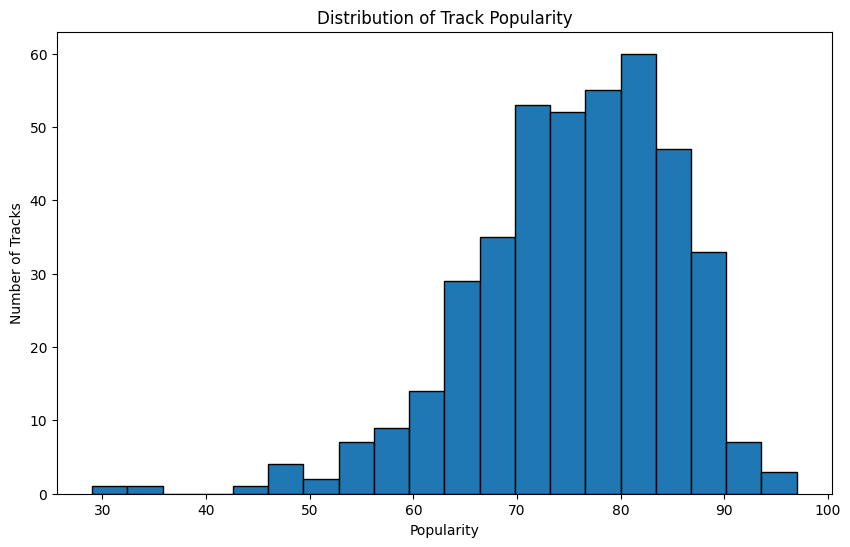

In [ ]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()


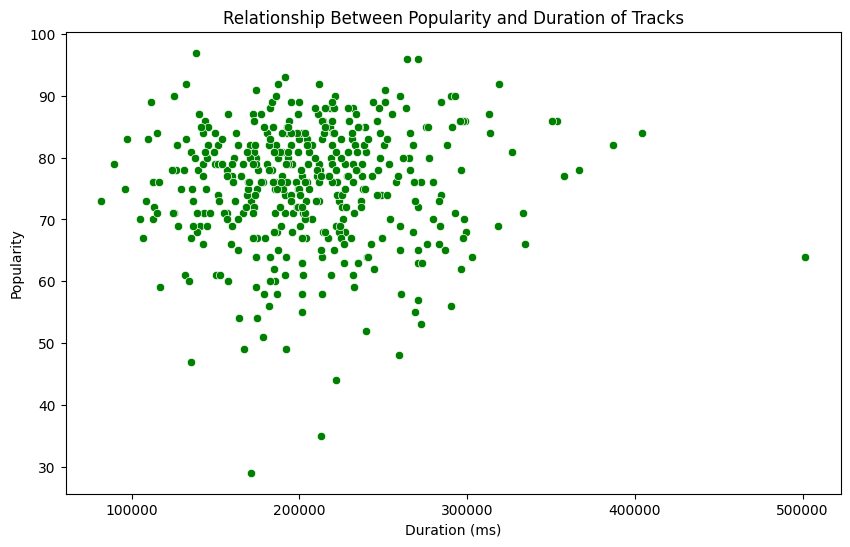

In [ ]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
import seaborn as sns

# Plot scatter plot between popularity and duration
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], color='green')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


<ipython-input-83-676e74cee739>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='coolwarm')


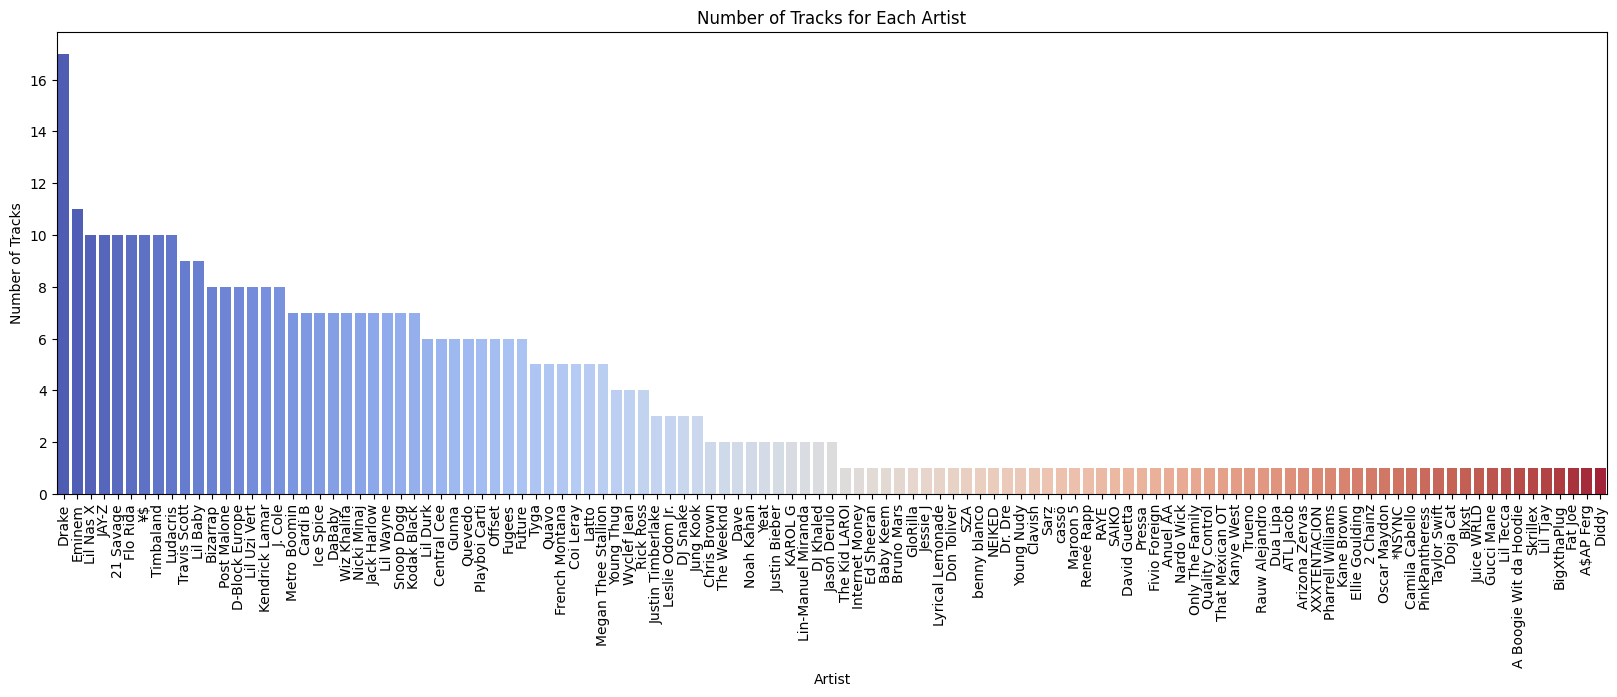

In [ ]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='Artist', order=df['Artist'].value_counts().index, palette='coolwarm')
plt.title('Number of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df[['Artist', 'Track Name', 'Popularity']].sort_values(by='Popularity').head(5)
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average?
# Calculate and display the average popularity for each artist
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print(top_5_artists)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [ ]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_5_most_popular_tracks = df[df['Artist'].isin(top_5_artists.index)].sort_values(by='Popularity', ascending=False).groupby('Artist').head(1)
print(top_5_most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


           Artist                    Track Name  Popularity
260            ¥$                      CARNIVAL          96
30   Travis Scott    FE!N (feat. Playboi Carti)          93
140         cassö                         Prada          92
241        Trueno  Mamichula - con Nicki Nicole          89
200  David Guetta            Baby Don't Hurt Me          87


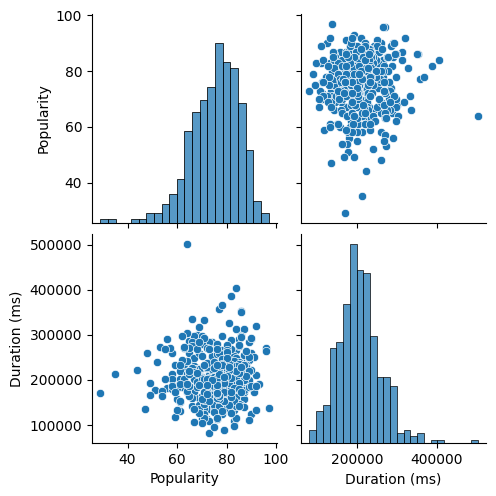

In [ ]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']])

plt.show()


<ipython-input-90-b70b14d24dc6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='viridis')


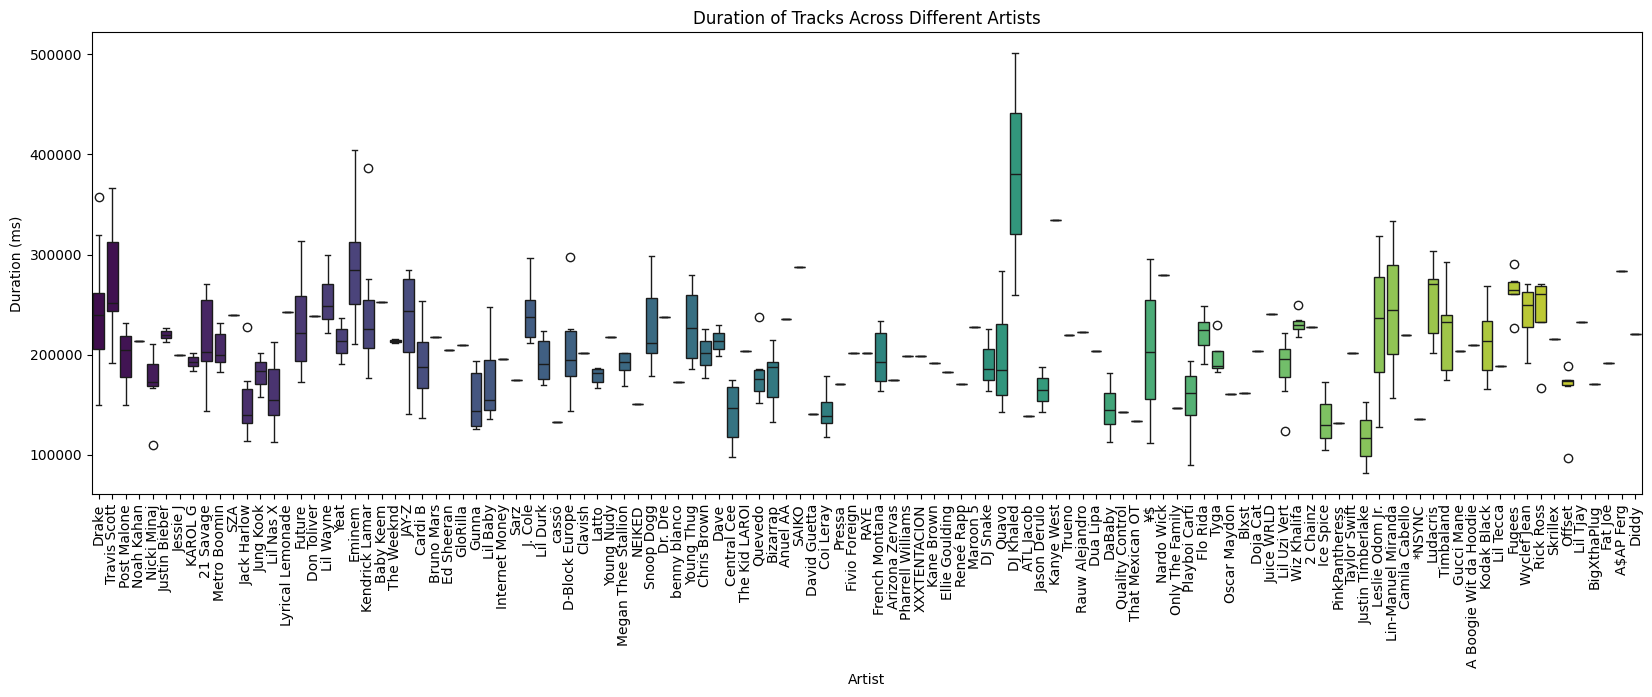

In [ ]:
# 9. Does the duration of tracks vary significantly across different artists?
# Explore this visually using a box plot or violin plot
plt.figure(figsize=(20,6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)', palette='viridis')
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()


<ipython-input-92-5fe2754c08a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Artist', y='Popularity', palette='plasma')


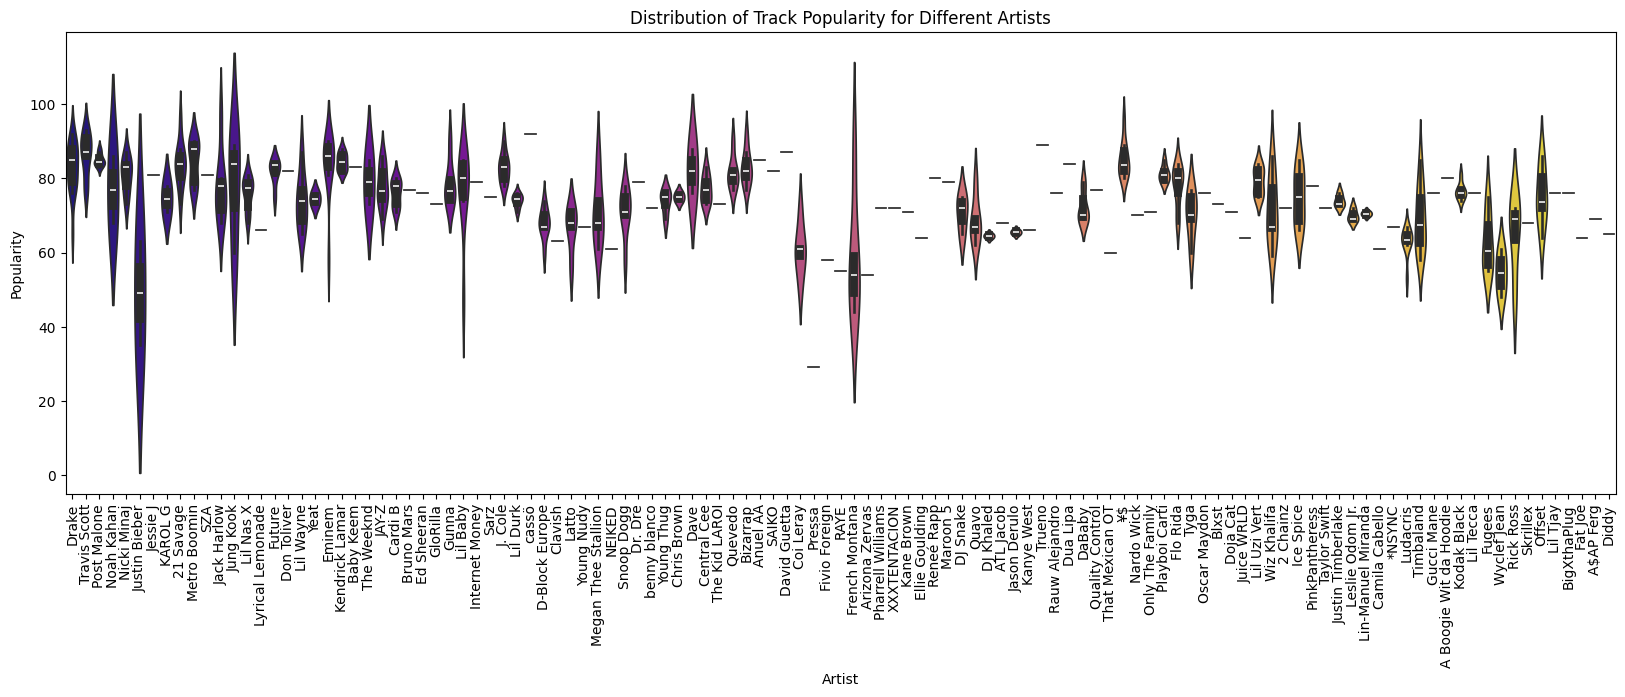

In [ ]:
# 10. How does the distribution of track popularity vary for different artists?
# Visualize this using a swarm plot or a violin plot
plt.figure(figsize=(20,6))
sns.violinplot(data=df, x='Artist', y='Popularity', palette='plasma')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()


#THANK YOU